In [21]:
import numpy as np
import math
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider
import pandas as pd

HW1

Problem 1

In [22]:
#Problem 1
def find_initial_guess_intervals(f, start=0, step_size=0.5, max_steps=1000):
    """
    Find initial guess intervals [a, b] of length 1 for the Bisection Method where the function changes sign.

    Parameters:
    - f: The function for which to find the roots.
    - start: The starting point for the search.
    - step_size: The step size to use when moving from the start point.
    - max_steps: The maximum number of steps to take from the start point.

    Returns:
    - A list of tuples [(a, b), ...] representing the intervals, or empty list if no change in sign is found.
    """
    intervals = []
    x_prev = start
    f_prev = f(x_prev)
    for _ in range(max_steps):
        x_next = x_prev + step_size
        f_next = f(x_next)

        if f_prev * f_next < 0:
            a = min(x_prev, x_next)
            b = max(x_prev, x_next)
            # Ensure that the interval is unique and does not significantly overlap with existing intervals
            if not any(a <= interval[1] and b >= interval[0] for interval in intervals):
                intervals.append((a, b))

        x_prev, f_prev = x_next, f_next

        # Invert direction if reaching the end of the step limit
        if _ == max_steps // 2:
            x_prev = start
            f_prev = f(x_prev)
            step_size = -step_size
        
    if not intervals:
        print("Failed to find a change in sign. Try adjusting the start point or step size.")
    
    return intervals

def bisection_method(f, a, b, tol=1e-5, max_iterations=1000):
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1, max_iterations + 1):
        x_n = (a_n + b_n) / 2
        f_x_n = f(x_n)
        if f(a_n) * f_x_n < 0:
            b_n = x_n
        elif f(b_n) * f_x_n < 0:
            a_n = x_n
        elif f_x_n == 0:
            print("Found exact solution.")
            return x_n
        else:
            print("Bisection method fails.")
            return None
        if abs(b - a)/2**n <= tol:  #e_n <= epsilon; abs(b_n - a_n) <= tol can also work
            return x_n
    print("Exceeded maximum iterations.")
    return (a_n + b_n) / 2

def equation1(x): return np.exp(x)-3*x**2
def equation2(x): return x**3-x**2-x-1
def equation3(x): return np.exp(x)-(1/(0.1+x**2))
def equation4(x): return x-1-0.3*np.cos(x)

def find_and_process_roots(equation, equation_number):
    intervals = find_initial_guess_intervals(equation)
    if intervals:
        for interval in intervals:
            root = bisection_method(equation, *interval)
            if root is not None:
                print(f"Equation {equation_number}: Interval {interval}. The root found is: {root}")
    else:
        print(f"Equation {equation_number}: No valid intervals found.")

# Example usage for each equation
find_and_process_roots(equation1, 1)
find_and_process_roots(equation2, 2)
find_and_process_roots(equation3, 3)
find_and_process_roots(equation4, 4)

Equation 1: Interval (0.5, 1.0). The root found is: 0.9100112915039062
Equation 1: Interval (3.5, 4.0). The root found is: 3.7330856323242188
Equation 1: Interval (-0.5, 0). The root found is: -0.45896148681640625
Equation 2: Interval (1.5, 2.0). The root found is: 1.8392868041992188
Equation 3: Interval (0.5, 1.0). The root found is: 0.6497573852539062
Equation 4: Interval (1.0, 1.5). The root found is: 1.1284255981445312


Problem 2

In [23]:
def newton_method(f, df, x0, tol=1e-5, max_iter=100):
    """
    Finds a root of the function f(x) = 0 using Newton's method, and returns the number of iterations.

    Parameters:
    - f: The function for which we are trying to approximate a root.
    - df: The derivative of the function f.
    - x0: Initial guess for a root of f(x).
    - tol: The tolerance for the approximation of the root.
    - max_iter: The maximum number of iterations.

    Returns:
    - A tuple containing:
        - The approximation for the root of f(x) = 0 if found, otherwise None.
        - The number of iterations used.
    """
    xn = x0
    for n in range(1, max_iter + 1):
        fxn = f(xn)
        dfxn = df(xn)
        if fxn == 0:
            return xn, n
        if dfxn == 0:
            print("Zero derivative. No solution found.")
            return None, n
        h = fxn / dfxn
        xn_next = xn - h
        if abs(h) < tol and math.isclose(f(xn_next), 0, abs_tol=tol):
            return xn_next, n
        xn = xn_next
    print(f"Failed to converge to the requested tolerance or precision within {max_iter} iterations for B={B}.")
    return xn, max_iter

# Define the derivatives of the equations
df1 = lambda x: np.exp(x) - 6*x
df2 = lambda x: 3*x**2 - 2*x - 1
df3 = lambda x: np.exp(x) + 2*x/(0.1 + x**2)**2
df4 = lambda x: 1 + 0.3*np.sin(x)

def find_and_process_roots_Newton(equation, df, equation_number):
    intervals = find_initial_guess_intervals(equation)
    if intervals:
        for interval in intervals:
            root, n =  newton_method(equation, df, bisection_method(equation, *interval))
            if root is not None:
                print(f"Equation {equation_number}: Initial guess {bisection_method(equation, *interval)}. The root found is: {root}")
    else:
        print(f"Equation {equation_number}: No valid intervals found.")

# Example usage for each equation
find_and_process_roots_Newton(equation1, df1, 1)
find_and_process_roots_Newton(equation2, df2, 2)
find_and_process_roots_Newton(equation3, df3, 3)
find_and_process_roots_Newton(equation4, df4, 4)

Equation 1: Initial guess 0.9100112915039062. The root found is: 0.9100075724968794
Equation 1: Initial guess 3.7330856323242188. The root found is: 3.7330790286730404
Equation 1: Initial guess -0.45896148681640625. The root found is: -0.4589622675374317
Equation 2: Initial guess 1.8392868041992188. The root found is: 1.8392867552141632
Equation 3: Initial guess 0.6497573852539062. The root found is: 0.6497506817520194
Equation 4: Initial guess 1.1284255981445312. The root found is: 1.1284250929922375


Problem 3

In [24]:
f = lambda x, B: x + np.exp(-B * x ** 2) * np.cos(x)
df = lambda x, B: 1 - 2 * B * x * np.exp(-B * x ** 2) * np.cos(x) - np.exp(-B * x ** 2) * np.sin(x)

# Values of B to test and initial guess
B_values = [1, 5, 10, 25, 50]
x0 = 0

# Apply Newton's method and print results along with iterations
for B in B_values:
    root, iterations = newton_method(lambda x: f(x, B), lambda x: df(x, B), x0)
    print(f"Root for B={B}: {root}, found in {iterations} iterations\n")

Root for B=1: -0.5884017765009963, found in 5 iterations

Root for B=5: -0.404911548201141, found in 7 iterations

Failed to converge to the requested tolerance or precision within 100 iterations for B=10.
Root for B=10: -0.0007451436379846132, found in 100 iterations

Failed to converge to the requested tolerance or precision within 100 iterations for B=25.
Root for B=25: -3.943746440526752e-10, found in 100 iterations

Failed to converge to the requested tolerance or precision within 100 iterations for B=50.
Root for B=50: 0.0, found in 100 iterations


Failed to converge within 100 iterations for B=10.
Failed to converge within 100 iterations for B=25.
Failed to converge within 100 iterations for B=50.


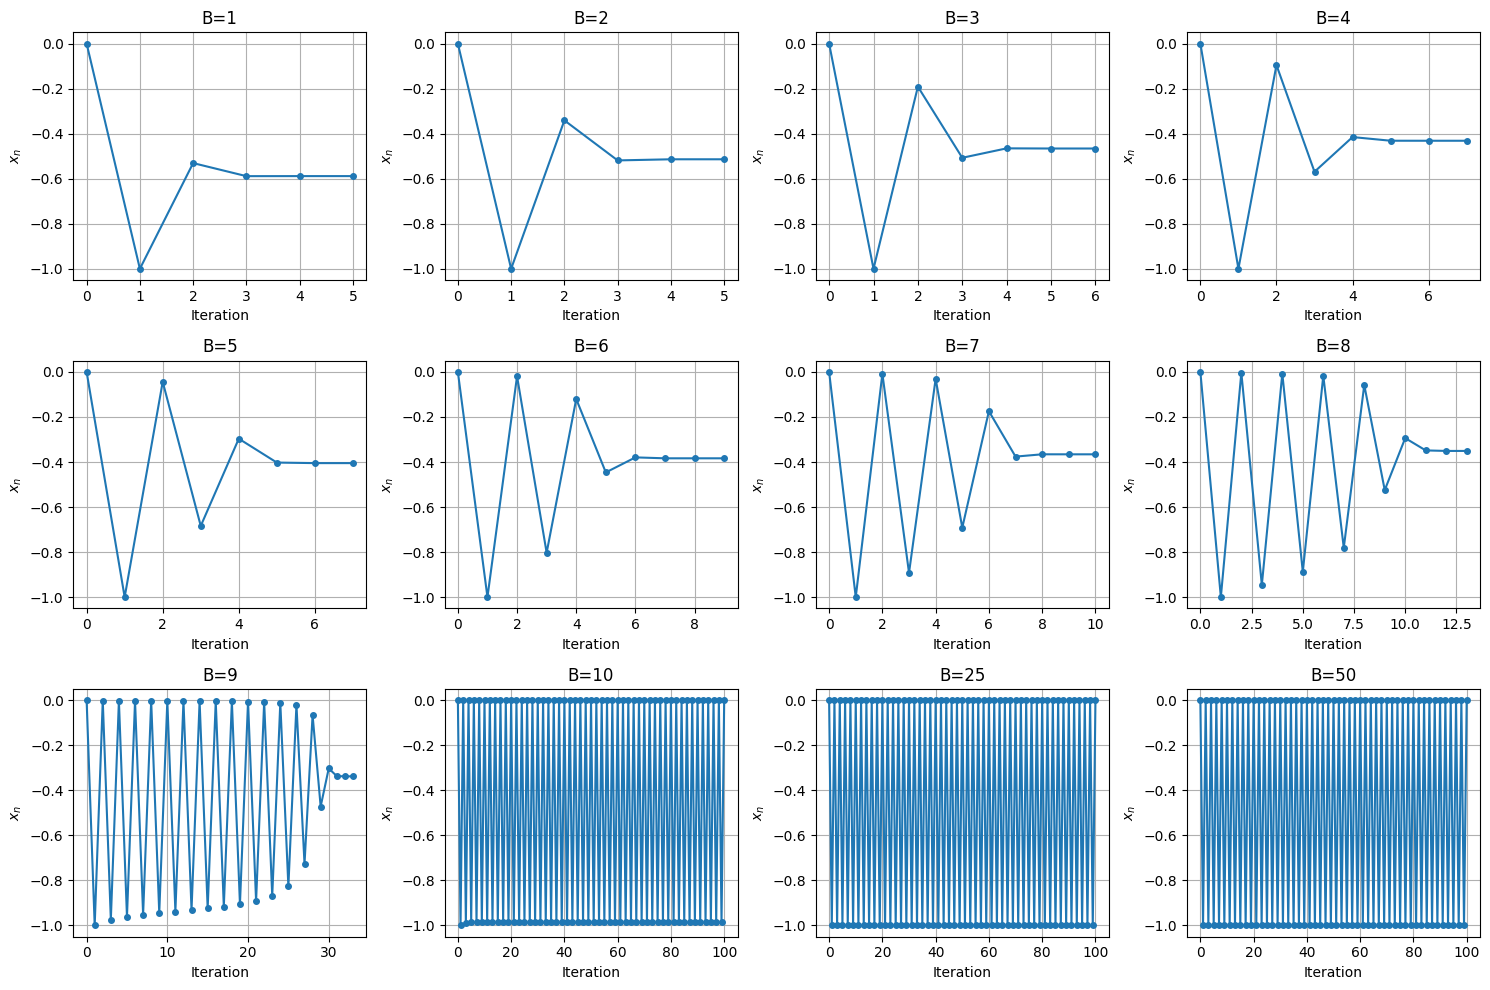

In [25]:
def newton_method_with_trace(f, df, x0, B, tol=1e-5, max_iter=100):
    """
    Applies Newton's Method and tracks the progress of each iteration.
    
    Returns:
    - A list of x values showing the progression of the algorithm.
    - The final approximation of the root, or None if not converged.
    """
    xn = x0
    trace = [x0]  # Initialize the trace list with the initial guess
    
    for n in range(max_iter):
        fxn = f(xn)
        dfxn = df(xn)
        if fxn == 0:
            return trace, xn
        if dfxn == 0:
            print("Zero derivative. No solution found.")
            return trace, None
        h = fxn / dfxn
        xn_next = xn - h
        trace.append(xn_next)  # Add the new guess to the trace
        
        if abs(h) < tol and math.isclose(f(xn_next), 0, abs_tol=tol):
            return trace, xn_next
        xn = xn_next
        
    print(f"Failed to converge within {max_iter} iterations for B={B}.")
    return trace, None

# B values to explore
B_values = list(range(1, 11)) + [25, 50]

# Create a panel of plots
plt.figure(figsize=(15, 10))
for i, B in enumerate(B_values, 1):
    trace, _ = newton_method_with_trace(lambda x: f(x, B), lambda x: df(x, B), x0, B)
    plt.subplot(3, 4, i)
    plt.plot(trace, marker='o', linestyle='-', markersize=4)
    plt.title(f'B={B}')
    plt.xlabel('Iteration')
    plt.ylabel('$x_n$')
    plt.tight_layout()
    plt.grid(True)

plt.show()

Problem 4

In [26]:
def secant_method(f, x0, x1, tol=1e-5, max_iter=1000):
    """
    Applies the Secant Method to find the root of a function.
    
    Parameters:
    - f: The function for which to find the root.
    - x0, x1: Initial guesses for the root.
    - tol: Tolerance for the approximation of the root.
    - max_iter: Maximum number of iterations.
    
    Returns:
    - The approximate root of the function.
    """
    for n in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1 - fx0) < tol:
            print("Difference between function values is too small. No solution found.")
            return None
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x2 - x1) < tol and math.isclose(f(x2), 0, abs_tol=tol):
            return x2
        x0, x1 = x1, x2
    print("Failed to converge.")
    return None

# Define equations
equations = [
    equation1,
    equation2,
    equation3,
    equation4
]

intervals_per_equation = []
for equation in equations:
    intervals_per_equation.append(find_initial_guess_intervals(equation))
    
# Apply the Secant Method to each equation for each interval
for i, (f, intervals) in enumerate(zip(equations, intervals_per_equation), start=1):
    print(f"Equation {i}:")
    for interval in intervals:
        x0, x1 = interval
        root = secant_method(f, x0, x1)
        if root is not None:
            print(f"  Root found using x0={x0}, x1={x1}: x ≈ {root}")
        else:
            print(f"  No root found using x0={x0}, x1={x1}")

Equation 1:
  Root found using x0=0.5, x1=1.0: x ≈ 0.9100075724883476
  Root found using x0=3.5, x1=4.0: x ≈ 3.733079024242385
  Root found using x0=-0.5, x1=0: x ≈ -0.4589622678871718
Equation 2:
  Root found using x0=1.5, x1=2.0: x ≈ 1.8392867549206668
Equation 3:
  Root found using x0=0.5, x1=1.0: x ≈ 0.6497506818008003
Equation 4:
  Root found using x0=1.0, x1=1.5: x ≈ 1.128425092992221


Problem 5

In [27]:
#Problem 5
f = lambda x, B: x + np.exp(-B * x ** 2) * np.cos(x)
B_values = [1, 5, 10, 25, 50]

# Apply Newton's method and print results along with iterations
for B in B_values:
    x0 = 0
    x1 = -0.5
    root = secant_method(lambda x: f(x, B), x0, x1)
    print(f"  With B set to {B}, Root found using x0={x0}, x1={x1}: x ≈ {root}")

  With B set to 1, Root found using x0=0, x1=-0.5: x ≈ -0.5884017765009899
  With B set to 5, Root found using x0=0, x1=-0.5: x ≈ -0.40491154800744533
  With B set to 10, Root found using x0=0, x1=-0.5: x ≈ -0.3264020092445775
  With B set to 25, Root found using x0=0, x1=-0.5: x ≈ -0.23743625551428565
  With B set to 50, Root found using x0=0, x1=-0.5: x ≈ -0.1832913337388532


Problem 6

Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.


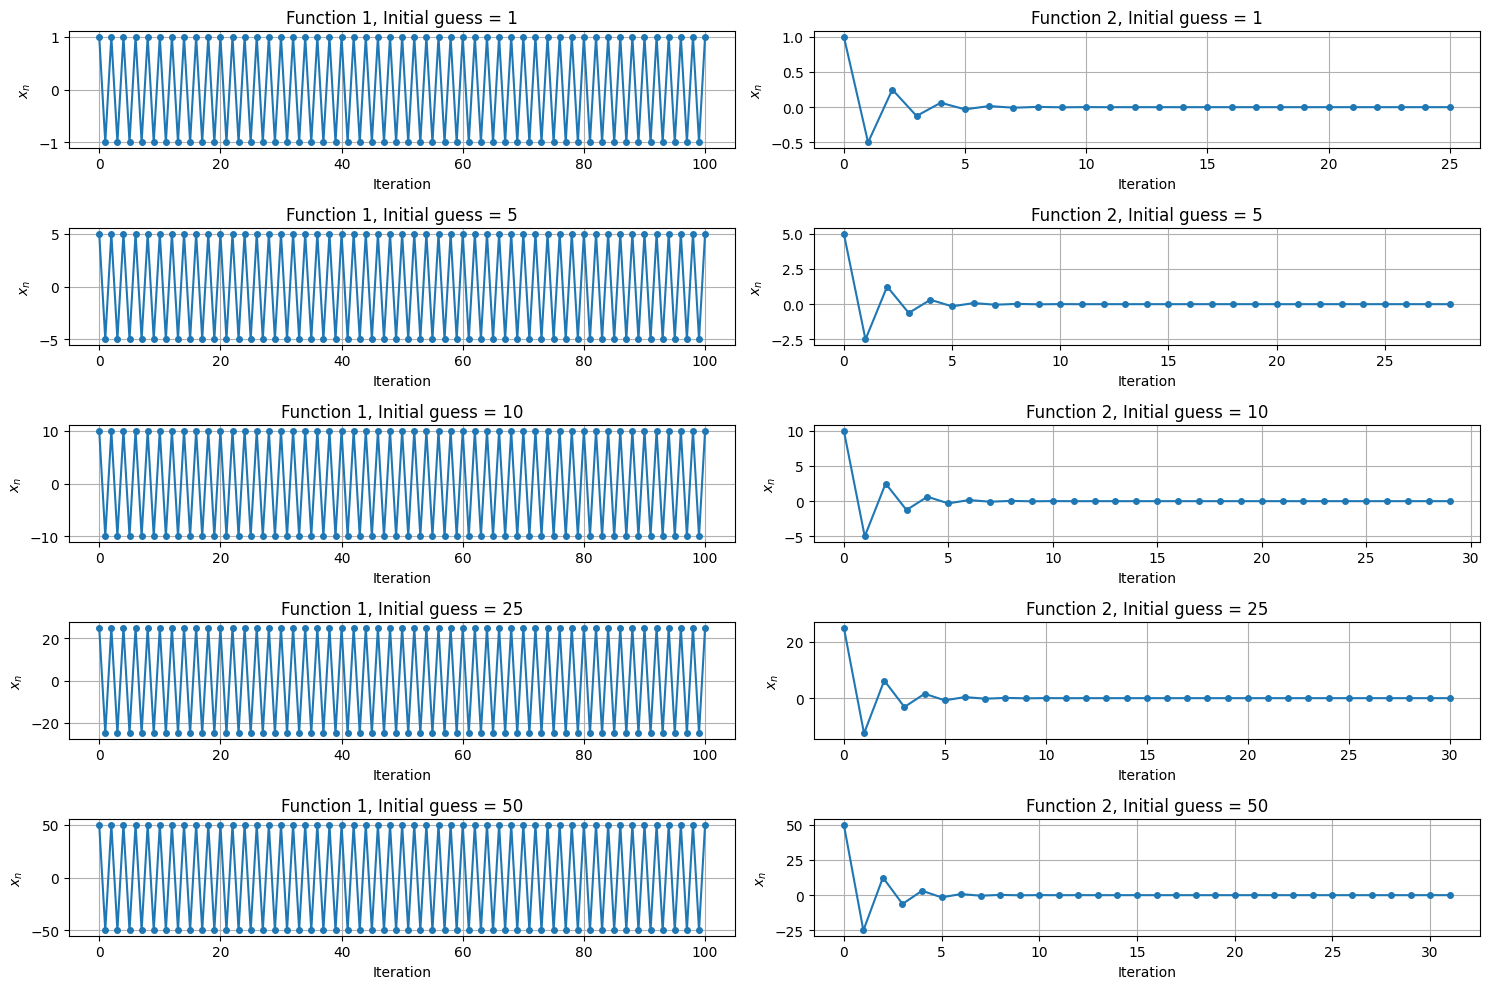

In [28]:
def newton_method_with_trace(f, df, x0, tol=1e-5, max_iter=100):
    """
    Applies Newton's Method and tracks the progress of each iteration.
    
    Returns:
    - A list of x values showing the progression of the algorithm.
    - The final approximation of the root, or None if not converged.
    """
    xn = x0
    trace = [x0]  # Initialize the trace list with the initial guess
    
    for n in range(max_iter):
        fxn = f(xn)
        dfxn = df(xn)
        if abs(fxn) == 0:
            return trace, xn
        if dfxn == 0:
            print("Zero derivative. No solution found.")
            return trace, None
        h = fxn / dfxn
        xn_next = xn - h
        trace.append(xn_next)  # Add the new guess to the trace
        
        if abs(h) < tol and math.isclose(f(xn_next), 0, abs_tol=tol):
            return trace, xn_next
        xn = xn_next
        
    print(f"Failed to converge within {max_iter} iterations.")
    return trace, None

# Function 1
def f1(x):
    if x >= 0:
        return np.sqrt(x)
    else:
        return -np.sqrt(-x)

# Function 2
def f2(x):
    if x >= 0:
        return np.cbrt(x**2)
    else:
        return -np.cbrt(x**2)
    
def derivative_f1(x):
    if x > 0:
        return 0.5 / np.sqrt(x)
    elif x < 0:
        return 0.5 / np.sqrt(-x)
    else:
        # Derivative does not exist at x = 0, but we can return a limit.
        # Here, we'll return None to indicate it's undefined.
        return None

def derivative_f2(x):
    if x > 0:
        return (2/3) / np.cbrt(x)
    elif x < 0:
        return -(2/3) / np.cbrt(x)
    else:
        # Derivative does not exist at x = 0, but we can return a limit.
        # Here, we'll return None to indicate it's undefined.
        return None    

funcs = [[f1, derivative_f1], [f2, derivative_f2]]

# Create a panel of plots
plt.figure(figsize=(15, 10))
for j, init in enumerate([1, 5, 10, 25, 50],0):
    for i, func in enumerate(funcs, 1):
        roots, _ = newton_method_with_trace(*func, init)
        plt.subplot(5, 2, j*2 + i)
        plt.plot(roots, marker='o', linestyle='-', markersize=4)
        plt.title(f'Function {i}, Initial guess = {init}')
        plt.xlabel('Iteration')
        plt.ylabel('$x_n$')
        plt.tight_layout()
        plt.grid(True)

plt.show()

Problem 9

In [29]:
f = lambda x : np.cos(x) + np.sin(50 * x) ** 2
df = lambda x : -np.sin(x) + 100 * np.sin(50 * x) * np.cos(50 * x)

Pi = np.pi

def explore(init, init2):
    # Create a panel of plots
    move = 0.001 * init + 0.00001 * init2
    i = Pi/2 + move
    plt.figure()
    roots, _ = newton_method_with_trace(f, df, i)
    roots = np.array(roots)
    plt.plot(roots-Pi/2, marker='o', linestyle='-', markersize=4)
    plt.title(f'Initial guess = Pi/2 + {move}')
    plt.xlabel('Iteration')
    plt.ylabel('$x_n - Pi/2$')
    # plt.ylim([-Pi/2, Pi/2])
    plt.tight_layout()
    plt.grid(True)
    
interact(explore,
         init=IntSlider(value=0, min=-1000, max=1000),
         init2=IntSlider(value=0, min=-100, max=100)
         )



interactive(children=(IntSlider(value=0, description='init', max=1000, min=-1000), IntSlider(value=0, descript…

<function __main__.explore(init, init2)>

Failed to converge within 100 iterations.


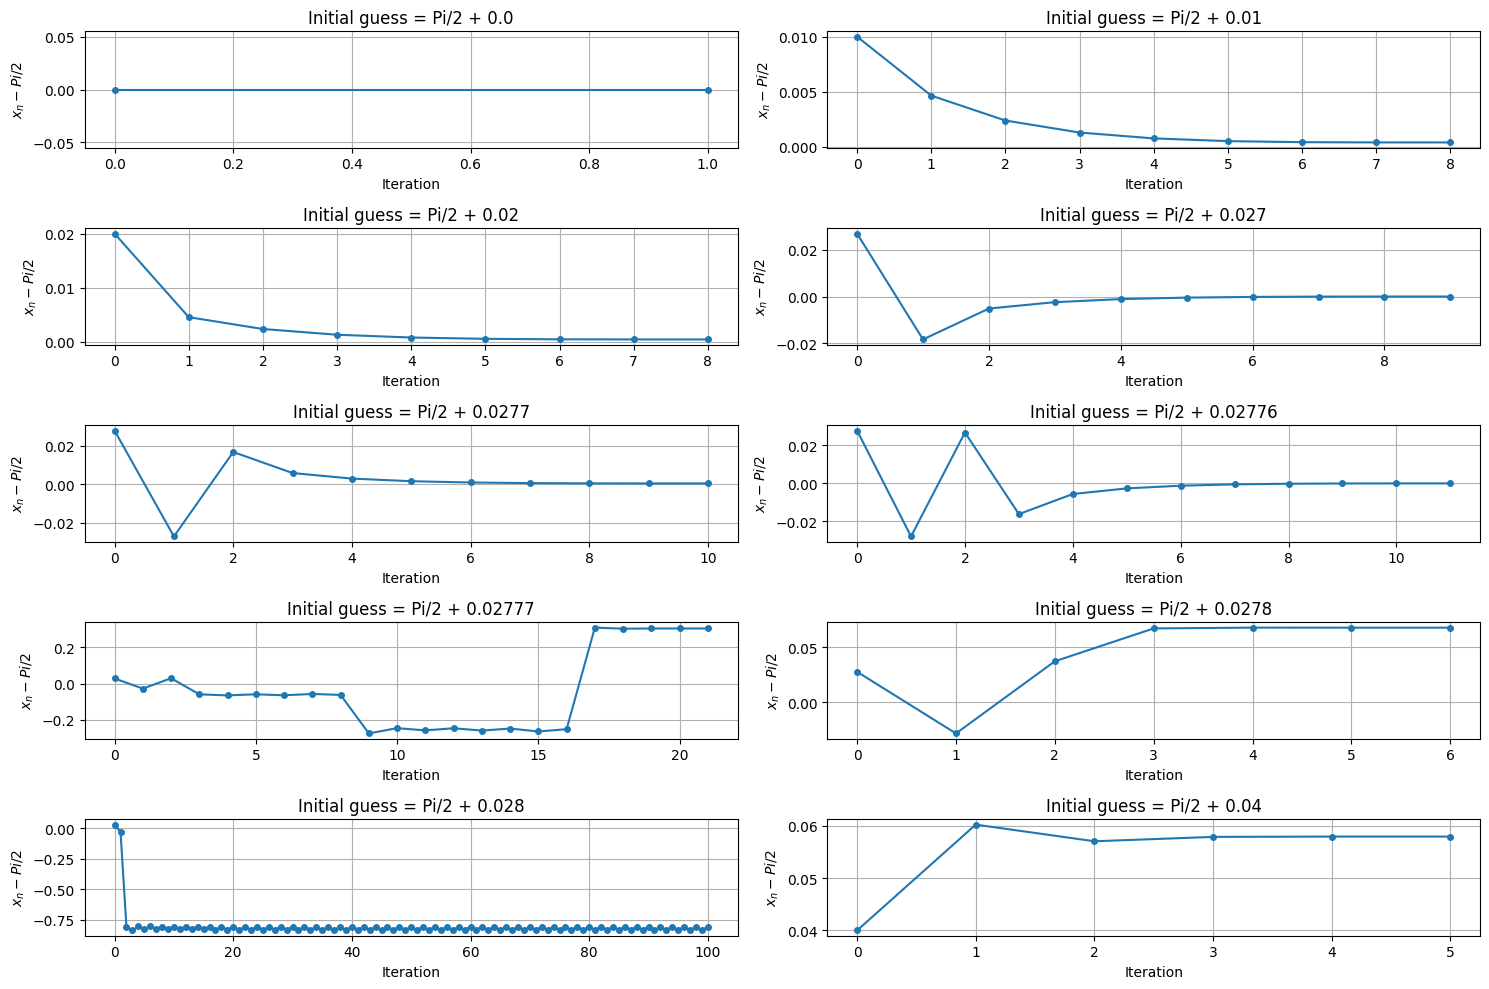

In [30]:

moves = []
for k, init in enumerate([0, 10, 20, 27, 28, 40],1):
    if init == 27:
        for j, init2 in enumerate([0, 70, 76, 77, 80],0):
            moves.append(0.001 * init + 0.00001 * init2)
    else:
        moves.append(0.001 * init)

# Create a panel of plots
plt.figure(figsize=(15, 10))
for j, move in enumerate(moves, 1):
        i = Pi/2 + move
        roots, _ = newton_method_with_trace(f, df, i)
        roots = np.array(roots)
        plt.subplot(5, 2, j)
        plt.plot(roots-Pi/2, marker='o', linestyle='-', markersize=4)
        plt.title(f'Initial guess = Pi/2 + {move}')
        plt.xlabel('Iteration')
        plt.ylabel('$x_n - Pi/2$')
        plt.tight_layout()
        plt.grid(True)
plt.show()


Failed to converge within 100 iterations.


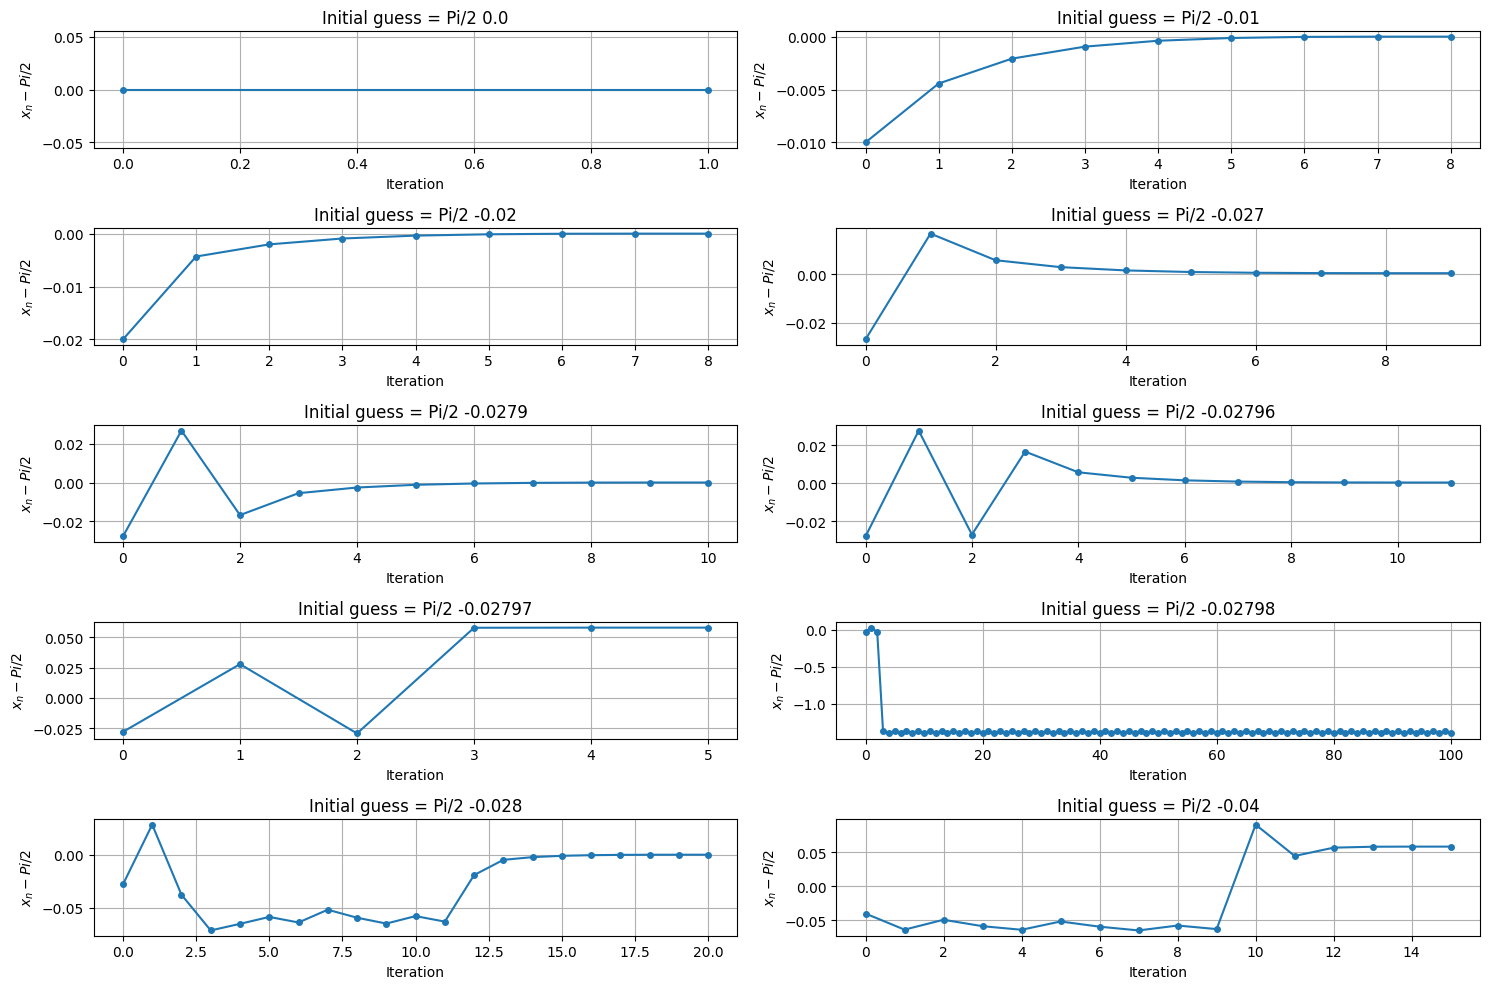

In [31]:
moves = []
for k, init in enumerate([-0, -10, -20, -27, -28, -40],1):
    if init == -27:
        for j, init2 in enumerate([-0, -90, -96, -97, -98],0):
            moves.append(0.001 * init + 0.00001 * init2)
    else:
        moves.append(0.001 * init)

# Create a panel of plots
plt.figure(figsize=(15, 10))
for j, move in enumerate(moves, 1):
        i = Pi/2 + move
        roots, _ = newton_method_with_trace(f, df, i)
        roots = np.array(roots)
        plt.subplot(5, 2, j)
        plt.plot(roots-Pi/2, marker='o', linestyle='-', markersize=4)
        plt.title(f'Initial guess = Pi/2 {move}')
        plt.xlabel('Iteration')
        plt.ylabel('$x_n - Pi/2$')
        plt.tight_layout()
        plt.grid(True)
plt.show()

In [40]:
alpha = Pi/2
# Updated list of initial guesses, this time picking a denser range around pi/2
initial_guesses_denser = np.linspace(alpha - 0.1, alpha + 0.1, 200)

# Updated table to show x0 - pi/2 and convergence
convergence_table_denser = []

# Run Newton's method for each initial guess in the denser range and check convergence
for x0 in initial_guesses_denser:
    trace, _ = newton_method_with_trace(f, df, x0, max_iter=100)
    converged = np.isclose(trace[-1], trace[-2]) if trace[-1] is not None else False
    # We record x0 - pi/2 to show how far the initial guess is from pi/2
    convergence_table_denser.append((x0 - alpha, converged, trace[-1] if converged else None))

convergence_table_denser  # Display the updated convergence table

Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.
Failed to converge within 100 iterations.


[(-0.10000000000000009, True, 1.5711964105465412),
 (-0.09899497487437192, True, 1.6287663924078142),
 (-0.09798994974874375, False, None),
 (-0.09698492462311559, False, None),
 (-0.09597989949748742, True, 1.703918078956282),
 (-0.09497487437185947, False, None),
 (-0.09396984924623131, True, 1.9349966367535913),
 (-0.09296482412060314, True, 1.6287663924295661),
 (-0.09195979899497497, True, 1.5707963208726436),
 (-0.0909547738693468, True, 1.6287663905778123),
 (-0.08994974874371864, True, 1.6287663916610504),
 (-0.08894472361809047, True, 1.6389068324560465),
 (-0.0879396984924623, True, 1.5711963859043723),
 (-0.08693467336683414, False, None),
 (-0.08592964824120619, True, 1.5707962903646768),
 (-0.08492462311557802, True, 1.57079632581825),
 (-0.08391959798994986, False, None),
 (-0.08291457286432169, True, 1.5707963156995526),
 (-0.08190954773869352, True, 1.8969903079473571),
 (-0.08090452261306535, False, None),
 (-0.07989949748743719, True, 1.5711963826224802),
 (-0.0788944

In [44]:
# Let's convert the results to a Pandas DataFrame for better visualization
df_convergence = pd.DataFrame(convergence_table_denser, columns=['x0 - pi/2', 'Converged', 'Final x_n'])

# Now, let's use a function to apply conditional formatting to the DataFrame
def highlight_alpha(row, alpha):
    close_to_alpha = np.isclose(row['Final x_n'], alpha, atol=1e-2) if row['Converged'] else False
    return ['background-color: yellow' if close_to_alpha else '' for _ in row]

# Apply the highlighting function to the DataFrame
df_convergence.style.apply(highlight_alpha, alpha=alpha, axis=1)

,x0 - pi/2,Converged,Final x_n
0,-0.100000,True,1.571196
1,-0.098995,True,1.628766
2,-0.097990,False,nan
3,-0.096985,False,nan
4,-0.095980,True,1.703918
5,-0.094975,False,nan
6,-0.093970,True,1.934997
7,-0.092965,True,1.628766
8,-0.091960,True,1.570796
9,-0.090955,True,1.628766
